In [3]:
import numpy as np
from numpy import pi

from qiskit import QuantumCircuit, Aer,IBMQ, execute
from qiskit.visualization import plot_bloch_multivector,plot_state_qsphere, plot_histogram
%config InlineBackend.figure_format = 'svg'

# Three Qubit Case
---------------------------------

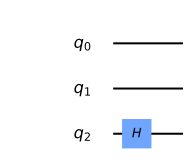

In [33]:
qc = QuantumCircuit(3)

qc.h(2)
qc.draw('mpl')

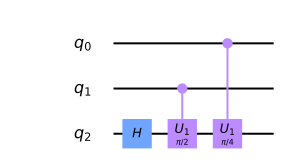

In [34]:
qc.cu1(pi/2,1,2)
qc.cu1(pi/4,0,2)
qc.draw('mpl')

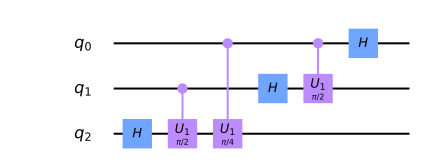

In [35]:
qc.h(1)
qc.cu1(pi/2,0,1)
qc.h(0)
qc.draw('mpl')

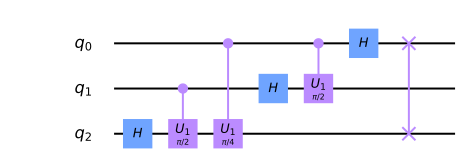

In [36]:
qc.swap(0,2)
qc.draw('mpl')

## General QFT
_________________

In [37]:
def rotations(circuit,n):
    if n == 0:
        return circuit
    n -=1
    circuit.h(n)
    for qubit in range(n):
        circuit.cu1(pi/2**(n-qubit),qubit,n)
    rotations(circuit,n)

In [38]:
def swap(circuit,n):
    for qubit in range(n//2):
        circuit.swap(qubit,n-qubit-1)
    return circuit

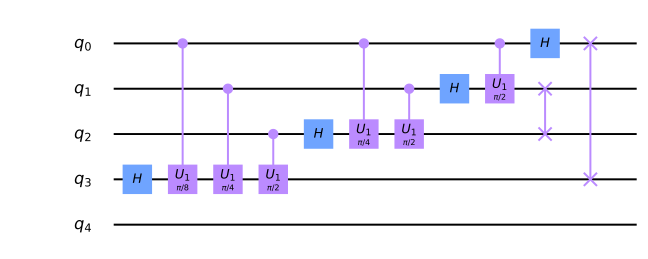

In [39]:
def qft(circuit,n):
    rotations(circuit,n)
    swap(circuit,n)
    return circuit

qc = QuantumCircuit(5)
qft(qc,4)
qc.draw('mpl')